<a href="https://colab.research.google.com/github/Deri-Nugroho/Intensive-Camp-Machine-Learning-2/blob/main/K_MEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 K-Means Clustering

### Apa itu K-Means?
K-Means adalah algoritma unsupervised learning yang digunakan untuk mengelompokkan data ke dalam beberapa grup (klaster) berdasarkan kesamaan.

Tujuan utama: Membagi data ke dalam k kelompok yang saling eksklusif (tidak tumpang tindih).

Konsep Dasar K-Means

*   Setiap klaster memiliki pusat (centroid).

*   Setiap titik data akan bergabung dengan klaster yang centroid-nya paling dekat.

*   K-Means akan memindahkan centroid sampai klaster stabil (konvergen).

# Proses Algoritma K-Means
1.   Tentukan jumlah klaster k.

2.   Inisialisasi k centroid secara acak.

3.   Assign setiap data ke centroid terdekat → membentuk klaster.

4.   Hitung ulang posisi centroid berdasarkan rata-rata titik dalam klaster.

5.   Ulangi langkah 3 dan 4 sampai:

*   Tidak ada perubahan klaster, atau
*   Mencapai iterasi maksimum.



### Kelebihan & Kekurangan K-Means
Kelebihan:

*   Cepat dan efisien untuk data besar.

*   Mudah diimplementasikan dan dipahami.

*   Cocok untuk segmentasi data sederhana.

Kekurangan:

*   Harus tentukan k di awal.

*   Peka terhadap outlier.

*   Tidak cocok untuk klaster non-bulat atau ukuran klaster tidak seimbang.

# Contoh Program Python: K-Means Clustering

In [ ]:
!pip install kaggle
! mkdir ~/.kaggle
! kaggle datasets download vjchoudhary7/customer-segmentation-tutorial-in-python
! unzip /content/customer-segmentation-tutorial-in-python.zip



Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 1.62MB/s]
Archive:  /content/customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


Data Awal:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


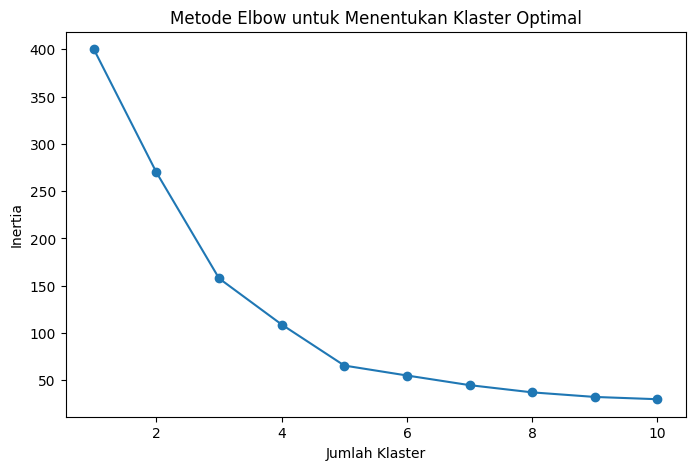

Data dengan Label Klaster:
   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        2
1                  15                      81        2
2                  16                       6        2
3                  16                      77        2
4                  17                      40        2


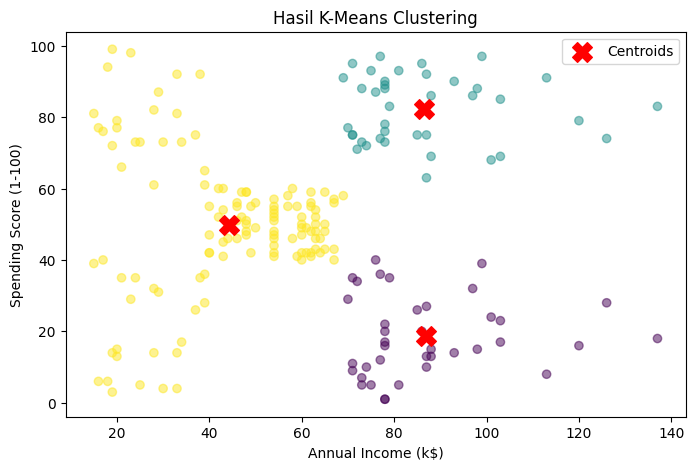

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Membaca dataset dari file CSV
file_path = "Mall_Customers.csv"  # Pastikan file tersedia di direktori kerja
df = pd.read_csv(file_path)

print("Data Awal:")
print(df.head())

# 2. Memilih hanya fitur numerik yang relevan untuk clustering
df_selected = df[['Annual Income (k$)', 'Spending Score (1-100)']]  # Hanya fitur numerik

# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# 3. Menentukan jumlah klaster optimal menggunakan metode Elbow
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Visualisasi metode Elbow
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Klaster Optimal')
plt.show()

# 4. Melakukan K-Means Clustering dengan jumlah klaster optimal
optimal_k = 3  # Sesuaikan berdasarkan hasil elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

print("Data dengan Label Klaster:")
print(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())

# 5. Visualisasi hasil klasterisasi
plt.figure(figsize=(8, 5))
plt.scatter(df_selected['Annual Income (k$)'], df_selected['Spending Score (1-100)'],
            c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
            scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hasil K-Means Clustering')
plt.legend()
plt.show()


Penjelasan Hasil K-Means Clustering
Gambar ini menunjukkan hasil clustering menggunakan K-Means dengan 3 klaster berdasarkan Annual Income (Pendapatan Tahunan dalam ribuan dolar) dan Spending Score (Skor Pengeluaran 1-100).

Cara Membaca Grafik:


*   Titik-titik berwarna = Data pelanggan yang dikelompokkan berdasarkan pola belanja.
*   Tanda merah "X" = Centroid (pusat dari masing-masing klaster).
*   Sumbu X = Pendapatan tahunan pelanggan.
*   Sumbu Y = Skor pengeluaran pelanggan (seberapa aktif mereka berbelanja).